# Just Some Additional Visualizations

This notebook makes extra charts and graphs to show patterns in the parathyroid imaging data. These charts help the main analysis by showing patient information and comparing how well different scans work.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load the data
df = pd.read_excel('../Data/final_clean_imaging_data.xlsx')

## Age Distribution Analysis

This cell creates a histogram with a KDE curve to show the age pattern of patients who had parathyroid surgery. We use this to understand what age groups are most commonly affected and see if the data follows a normal distribution pattern.


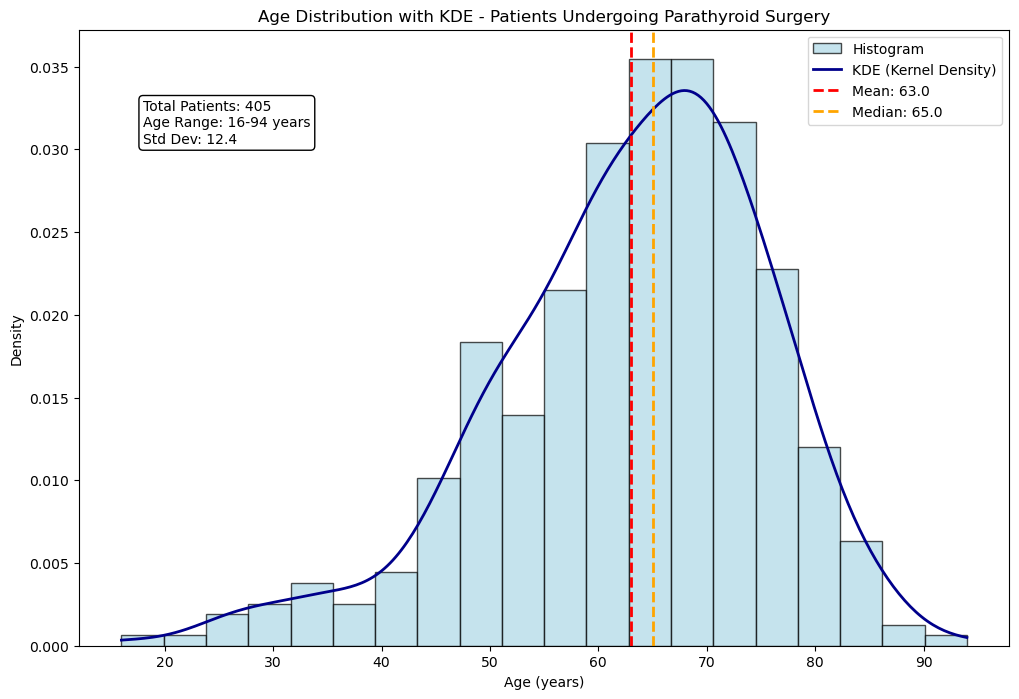

In [21]:
# Get ages
ages = df['Age'].dropna()

# Make plot
plt.figure(figsize=(12, 8))

# Histogram
plt.hist(ages, bins=20, density=True, alpha=0.7, color='lightblue', edgecolor='black', label='Histogram')

# KDE curve
kde = gaussian_kde(ages)
x_values = np.linspace(ages.min(), ages.max(), 300)
plt.plot(x_values, kde(x_values), color='darkblue', linewidth=2, label='KDE (Kernel Density)')

# Mean and median lines
plt.axvline(ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ages.mean():.1f}')
plt.axvline(ages.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {ages.median():.1f}')

# Labels
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution with KDE - Patients Undergoing Parathyroid Surgery')

# Stats box
stats = f'Total Patients: {len(ages)}\nAge Range: {ages.min()}-{ages.max()} years\nStd Dev: {ages.std():.1f}'
plt.text(18, 0.033, stats, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))

plt.legend()
plt.show()

## PPV vs Sensitivity Scatter Plot

This scatter plot compares how good each scan is at finding disease (sensitivity) versus how accurate it is when it finds something (PPV). The size of each bubble shows how many patients had that scan type. This helps us see which scans offer the best balance between detection and accuracy.


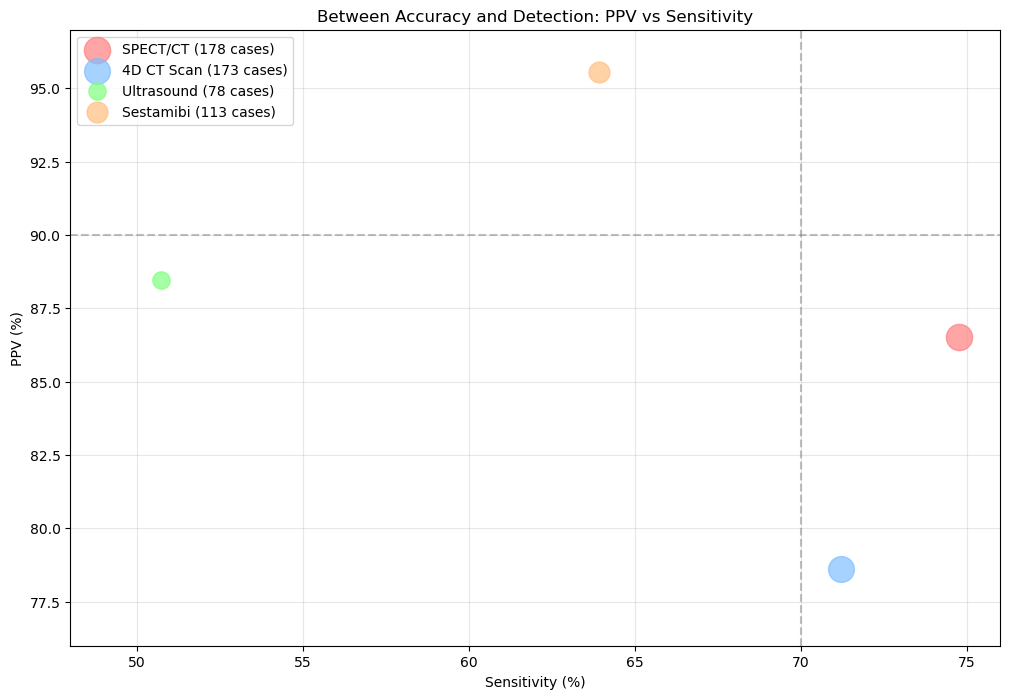

In [ ]:
# Calculate sensitivity and PPV from the data
modalities = ['SPECT/CT', '4D CT Scan', 'Ultrasound', 'Sestamibi']
colors = ['#ff7f7f', '#7fbfff', '#7fff7f', '#ffbf7f']

# Calculate metrics for each modality
sensitivity_data = []
ppv_data = []
case_counts = []

for modality in modalities:
    # Calculate sensitivity 
    concordance_col = f"{modality} Calculated Concordance"
    localizing_cases = df[df[concordance_col].isin(['Yes (Exact)', 'Yes (Side)'])]
    non_localizing_cases = df[df[modality] == 'Non-localizing']
    
    true_positives = len(localizing_cases)
    false_negatives = len(non_localizing_cases)
    sensitivity = (true_positives / (true_positives + false_negatives)) * 100
    
    # Calculate PPV
    total_positive_scans = len(df[df[modality].notna() & (df[modality] != 'Non-localizing') & (df[modality] != 'No Scan')])
    ppv = (true_positives / total_positive_scans) * 100
    
    sensitivity_data.append(sensitivity)
    ppv_data.append(ppv)
    case_counts.append(total_positive_scans)

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot each scan as a bubble
for i, modality in enumerate(modalities):
    plt.scatter(sensitivity_data[i], ppv_data[i], 
               s=case_counts[i]*2, 
               color=colors[i], 
               alpha=0.7, 
               label=f"{modality} ({case_counts[i]} cases)")

# Add reference lines
plt.axhline(y=90, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=70, color='gray', linestyle='--', alpha=0.5)

# Labels and title
plt.xlabel('Sensitivity (%)')
plt.ylabel('PPV (%)')
plt.title('Between Accuracy and Detection: PPV vs Sensitivity')

# Set axis limits
plt.xlim(48, 76)
plt.ylim(76, 97)

# Add legend
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()
